[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


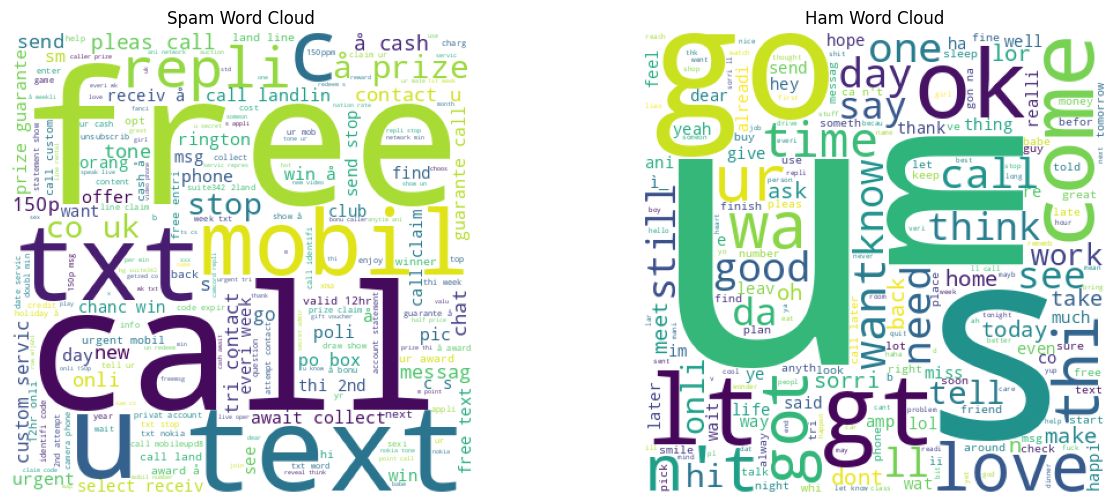


Naive Bayes:
Accuracy: 0.9668161434977578
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Logistic Regression:
Accuracy: 0.9560538116591928
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.96      0.70      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115


Support Vector Machine:
Accuracy: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.

In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset with specified encoding
data = pd.read_csv('spam_data.csv', encoding='ISO-8859-1')

# Text preprocessing
# Lowercasing
data['v2'] = data['v2'].str.lower()
# Tokenization and stemming
stemmer = PorterStemmer()
data['v2'] = data['v2'].apply(nltk.word_tokenize)
data['v2'] = data['v2'].apply(lambda x: [stemmer.stem(word) for word in x])
# Removing stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
data['v2'] = data['v2'].apply(lambda x: [word for word in x if word not in stop_words])
# Convert tokens back to string
data['v2'] = data['v2'].apply(lambda x: ' '.join(x))

# Word cloud visualization for spam messages
spam_messages = ' '.join(data[data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=400, height=400, background_color ='white').generate(spam_messages)

# Word cloud visualization for ham messages
ham_messages = ' '.join(data[data['v1'] == 'ham']['v2'])
ham_wordcloud = WordCloud(width=400, height=400, background_color ='white').generate(ham_messages)

# Displaying word clouds side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train and evaluate classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# Print some sample messages along with their predicted labels by each classifier
sample_messages = ["Hey, how are you?", "Get a free iPhone now!", "Reminder: Meeting tomorrow at 10 AM."]
sample_messages_tfidf = vectorizer.transform(sample_messages)

print("\nSample Messages Predictions:")
for name, clf in classifiers.items():
    print(f"\n{name}:")
    predictions = clf.predict(sample_messages_tfidf)
    for msg, pred in zip(sample_messages, predictions):
        print(f"Message: {msg} --> Predicted Label: {pred}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-10-33b98143b69e>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['v2'] = data['v2'].str.replace(r'\W', ' ')
<ipython-input-10-33b98143b69e>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data['v2'] = data['v2'].str.replace(r'\d+', ' ')
<ipython-input-10-33b98143b69e>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  data['v2'] = data['v2'].str.replace(r'http\S+|www.\S+', ' ')


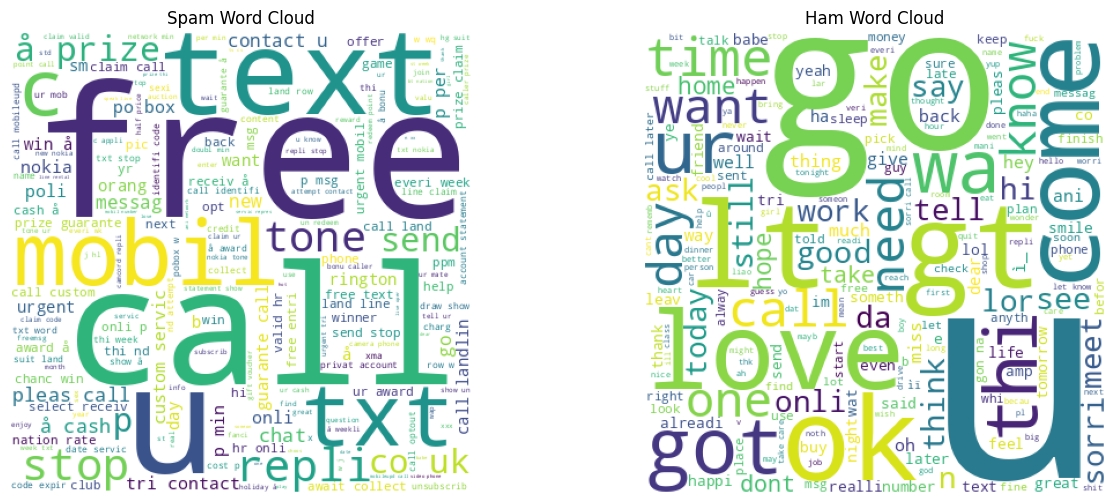


Naive Bayes:
Accuracy: 0.9820627802690582
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Logistic Regression:
Accuracy: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Support Vector Machine:
Accuracy: 0.9829596412556054
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset with specified encoding
data = pd.read_csv('spam_data.csv', encoding='ISO-8859-1')

# Text preprocessing
# Lowercasing
data['v2'] = data['v2'].str.lower()
# Removing special characters, numbers, and URLs
data['v2'] = data['v2'].str.replace(r'\W', ' ')
data['v2'] = data['v2'].str.replace(r'\d+', ' ')
data['v2'] = data['v2'].str.replace(r'http\S+|www.\S+', ' ')
# Tokenization and stemming
stemmer = PorterStemmer()
data['v2'] = data['v2'].apply(nltk.word_tokenize)
data['v2'] = data['v2'].apply(lambda x: [stemmer.stem(word) for word in x])
# Removing stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
data['v2'] = data['v2'].apply(lambda x: [word for word in x if word not in stop_words])
# Convert tokens back to string
data['v2'] = data['v2'].apply(lambda x: ' '.join(x))

# Word cloud visualization for spam messages
spam_messages = ' '.join(data[data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=400, height=400, background_color ='white').generate(spam_messages)

# Word cloud visualization for ham messages
ham_messages = ' '.join(data[data['v1'] == 'ham']['v2'])
ham_wordcloud = WordCloud(width=400, height=400, background_color ='white').generate(ham_messages)

# Displaying word clouds side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Hyperparameter Tuning for Naive Bayes
nb_params = {'alpha': [0.1, 0.5, 1.0]}
nb_grid_search = GridSearchCV(MultinomialNB(), nb_params, cv=5)
nb_grid_search.fit(X_train_tfidf, y_train)
nb_best_clf = nb_grid_search.best_estimator_

# Hyperparameter Tuning for Logistic Regression
lr_params = {'C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5)
lr_grid_search.fit(X_train_tfidf, y_train)
lr_best_clf = lr_grid_search.best_estimator_

# Hyperparameter Tuning for SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid_search.fit(X_train_tfidf, y_train)
svm_best_clf = svm_grid_search.best_estimator_

# Train and evaluate classifiers
classifiers = {
    "Naive Bayes": nb_best_clf,
    "Logistic Regression": lr_best_clf,
    "Support Vector Machine": svm_best_clf
}

for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Print some sample messages along with their predicted labels by each classifier
# Sample messages including another spam-like message
sample_messages = ["Hey, how are you?", "Claim your prize now! You've won $1000 cash!", "Reminder: Meeting tomorrow at 10 AM."]
sample_messages_tfidf = vectorizer.transform(sample_messages)

print("\nSample Messages Predictions:")
for name, clf in classifiers.items():
    print(f"\n{name}:")
    predictions = clf.predict(sample_messages_tfidf)
    for msg, pred in zip(sample_messages, predictions):
        print(f"Message: {msg} --> Predicted Label: {pred}")
